In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline

#Read Necessary files
BF_data = pd.read_csv("/Users/atousa/Desktop/McMaster/BDA-102/Neural_network/data/BlackFriday.csv")

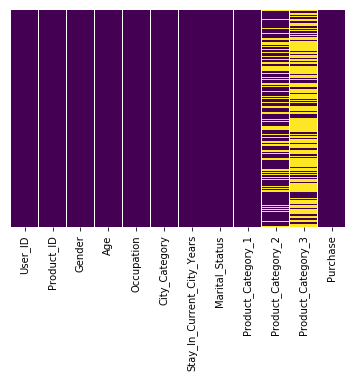

In [25]:
sns.heatmap(BF_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
BF_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [27]:
BF_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [28]:
BF_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [30]:
# product ID does not imapct the sale 
BF_data.drop(['Product_Category_3','User_ID','Product_ID'],axis=1,inplace=True)
BF_data['Product_Category_2']=BF_data['Product_Category_2'].fillna(BF_data['Product_Category_2'].mean())

In [32]:
from sklearn.preprocessing import LabelEncoder

#Encode labels with value between 0 and n_classes-1
for var in ['Gender','Age','City_Category','Stay_In_Current_City_Years']:
    number = LabelEncoder()
    BF_data[var] = number.fit_transform(BF_data[var].astype('str'))

In [33]:
BF_data.head() 

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.842144,8370
1,0,0,10,0,2,0,1,6.000000,15200
2,0,0,10,0,2,0,12,9.842144,1422
3,0,0,10,0,2,0,12,14.000000,1057
4,1,6,16,2,4,0,8,9.842144,7969


In [34]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler(feature_range=(0, 1))
x1=scale.fit_transform(BF_data[['Age','Occupation','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']])
x2=BF_data[['Gender','City_Category','Marital_Status']]
y=BF_data['Purchase']

x1=pd.DataFrame(x1, columns=['Age','Occupation','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2'])
x=pd.concat([x2, x1], axis=1)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [40]:
type(x)

pandas.core.frame.DataFrame

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [41]:
type(x_train)

pandas.core.frame.DataFrame

# Build the model

In [39]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten

model = Sequential()
model.add(Dense(100, input_dim=8, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary() #Print model Summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])
# Fit Model
#keras expects model inputs to be numpy arrays - not pandas.DataFrames.
model.fit(x_train.as_matrix(), y_train.as_matrix(), epochs=10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Epoch 1/10
376303/376303 [==============================] - 43s - loss: 17223034.0132 - mean_absolute_error: 3042.2306 - mean_absolute_percentage_error: 64.1594    
Epoch 2/10
376303/376303 [==============================] - 43s - loss: 17224992.1747 - mean_absolute_error: 3042.6496 - mean_absolute_percentage_error: 64.1909    
Epoch 3/10
376303/376303 [==============================] - 43s - loss: 17223517.4398 - mean_absolute_error: 3042.4380 - mean_absolute_percentage_error: 64.1954    
Epoch 4/10
376303/376303 [==============================] - 43s - loss: 17225235.0309 - mean_absolute_error: 3041.9289 - mean_absolute_percentage_error: 64.1873    
Epoch 5/10
376303/376303 [==============================] - 43s - loss: 17222981.5179 - mean_absolute_error: 3042.4343 - mean_absolute_percentage_error: 64.1893    
Epoch 6/10
376303/376303 [==============================] - 45s - loss: 17225727.2757 - mean_absolute_error: 3042.4901 - mean_absolute_percentage_error: 64.2090    
Epoch 7/10

# Prediction

In [45]:
from sklearn.metrics import mean_squared_error
pred= model.predict(x_test.as_matrix())
score = np.sqrt(mean_squared_error(y_test.as_matrix(),pred))
print (score)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


4152.452633737524


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
from sklearn.metrics import mean_squared_error
pred= model.predict(x_train.as_matrix())
score = np.sqrt(mean_squared_error(y_train.as_matrix(),pred))
print (score)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


4149.031467779106


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
